# Laminar analysis of the cortical sheet in Python

**Bok (1929).** Der Einfluß der in den Furchen und Windungen auftretenden Krümmungen der Großhirnrinde auf die Rindenarchitektur. Zeitschrift Für Die Gesamte Neurologie Und Psychiatrie

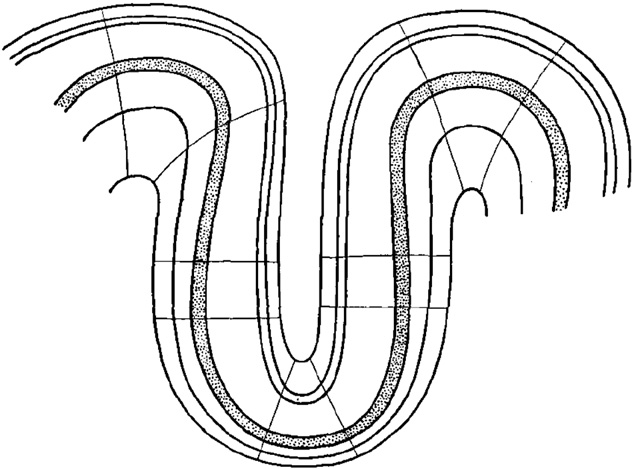

In [1]:
from IPython.display import Image
Image(filename='bok.png', width=300) 

**Waehnert et al (2014)**. Anatomically motivated modeling of cortical laminae. NeuroImage. http://doi.org/10.1016/j.neuroimage.2013.03.078

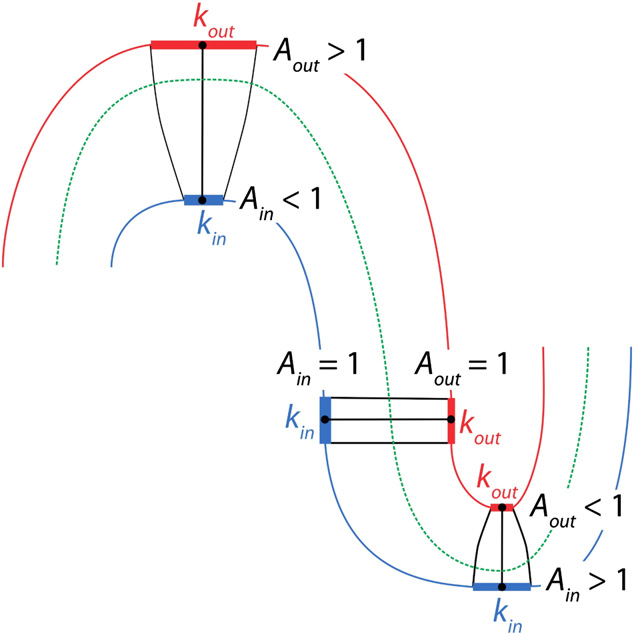

In [2]:
Image(filename='waehnert.png', width=300) 

**We have**:  CBSTools for extracting intracortical layers in a volume-preserving approach, sampling data on these surfaces, ...

**But** :Dependent on MIPAV/JIST framework -- hard to install

**We want**: CBSTools in Python -- easy to install, easy to use, easy to integrate with other Python-based tools

https://github.com/juhuntenburg/laminar_python

https://github.com/piloubazin/cbstools-public

In [3]:
%matplotlib inline

In [4]:
from nilearn import plotting
from nilearn._utils.niimg_conversions import _index_img
import matplotlib.pyplot as plt

### Import functions and get help

In [5]:
import laminar_python

In [6]:
laminar_python.create_levelsets?

### Inputs

In [7]:
out_dir = '/tmp/'

gwb_prob = '../data/adult_F04_intern_orig_binmask.nii.gz'
cgb_prob = '../data/adult_F04_extern_orig_binmask.nii.gz'
intensity = '../data/F04_01032013_MSME_TEsum_magn_initial.nii'
mesh = '../data/adult_F04_midcortical_surf.vtk'

In [8]:
coords = (-5, -2, 1)
n_layers = 5

In [9]:
import nibabel as nb

### Simplest input: tissue classification

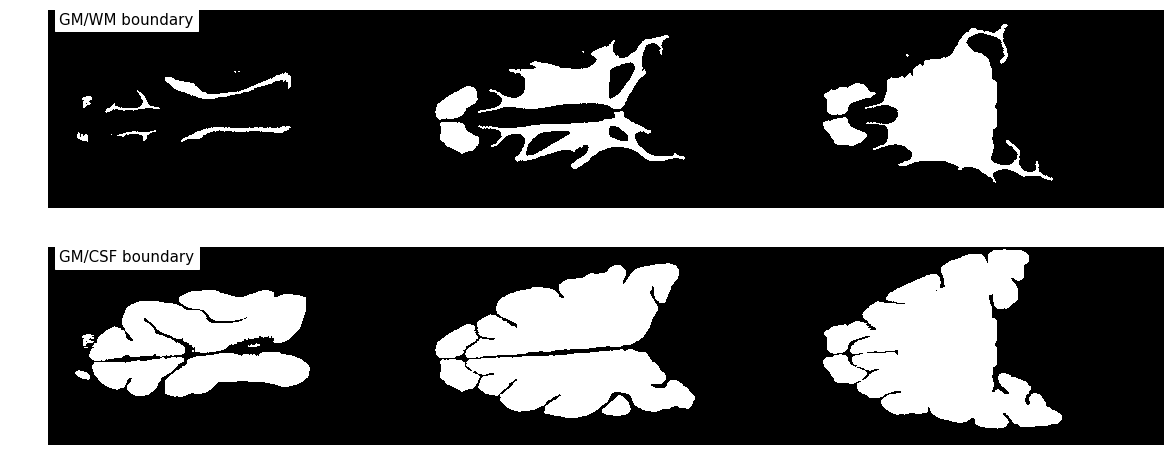

In [10]:
fig=plt.figure(figsize=(20,8));
ax1=fig.add_subplot(211)
plotting.plot_anat(gwb_prob, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax1, title='GM/WM boundary', vmax=1)
ax2=fig.add_subplot(212)
plotting.plot_anat(cgb_prob, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax2, title='GM/CSF boundary', vmax=1)

### Transforming to levelsets

In [11]:
gwb = laminar_python.create_levelsets(gwb_prob, base_name=out_dir+'gwb')

In [12]:
cgb = laminar_python.create_levelsets(cgb_prob, base_name=out_dir+'cgb')

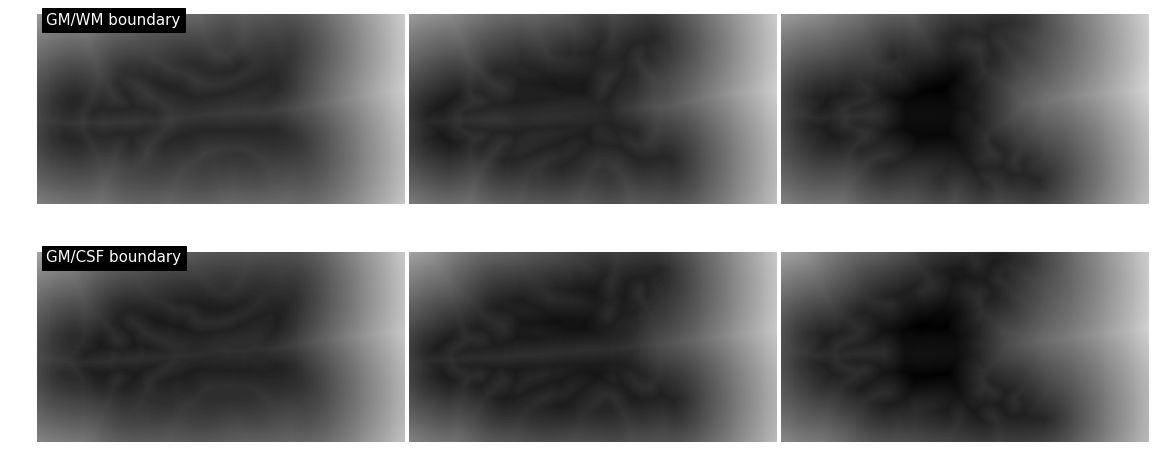

In [13]:
fig=plt.figure(figsize=(20,8));
ax1=fig.add_subplot(211)
plotting.plot_anat(gwb, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax1, title='GM/WM boundary', vmin=gwb.get_data().min())
ax2=fig.add_subplot(212)
plotting.plot_anat(cgb, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax2, title='GM/CSF boundary', vmin=cgb.get_data().min())

### Finding equivolumetric layers

In [14]:
depth, layers, boundaries = laminar_python.layering(gwb, cgb, n_layers=n_layers, 
                                                         base_name=out_dir+'layering')

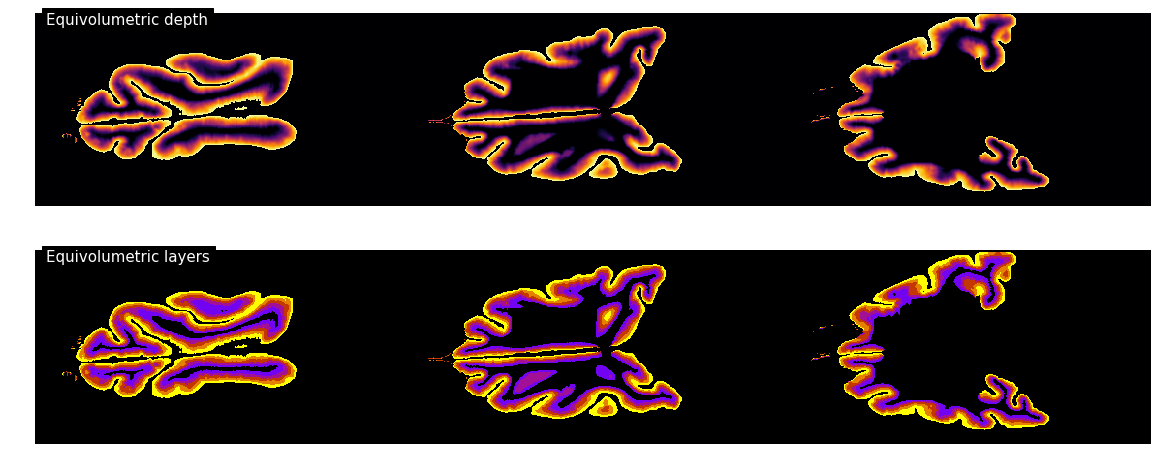

In [15]:
fig=plt.figure(figsize=(20,8));
ax1=fig.add_subplot(211)
plotting.plot_img(depth, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax1, title='Equivolumetric depth', cmap='inferno')
ax2=fig.add_subplot(212)
plotting.plot_img(layers, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax2, title='Equivolumetric layers', cmap='gnuplot', vmin=0, vmax=5)

### Sampling intensity on layers

In [16]:
profiles = laminar_python.profile_sampling(boundaries, intensity, base_name=out_dir+'profile_volume')

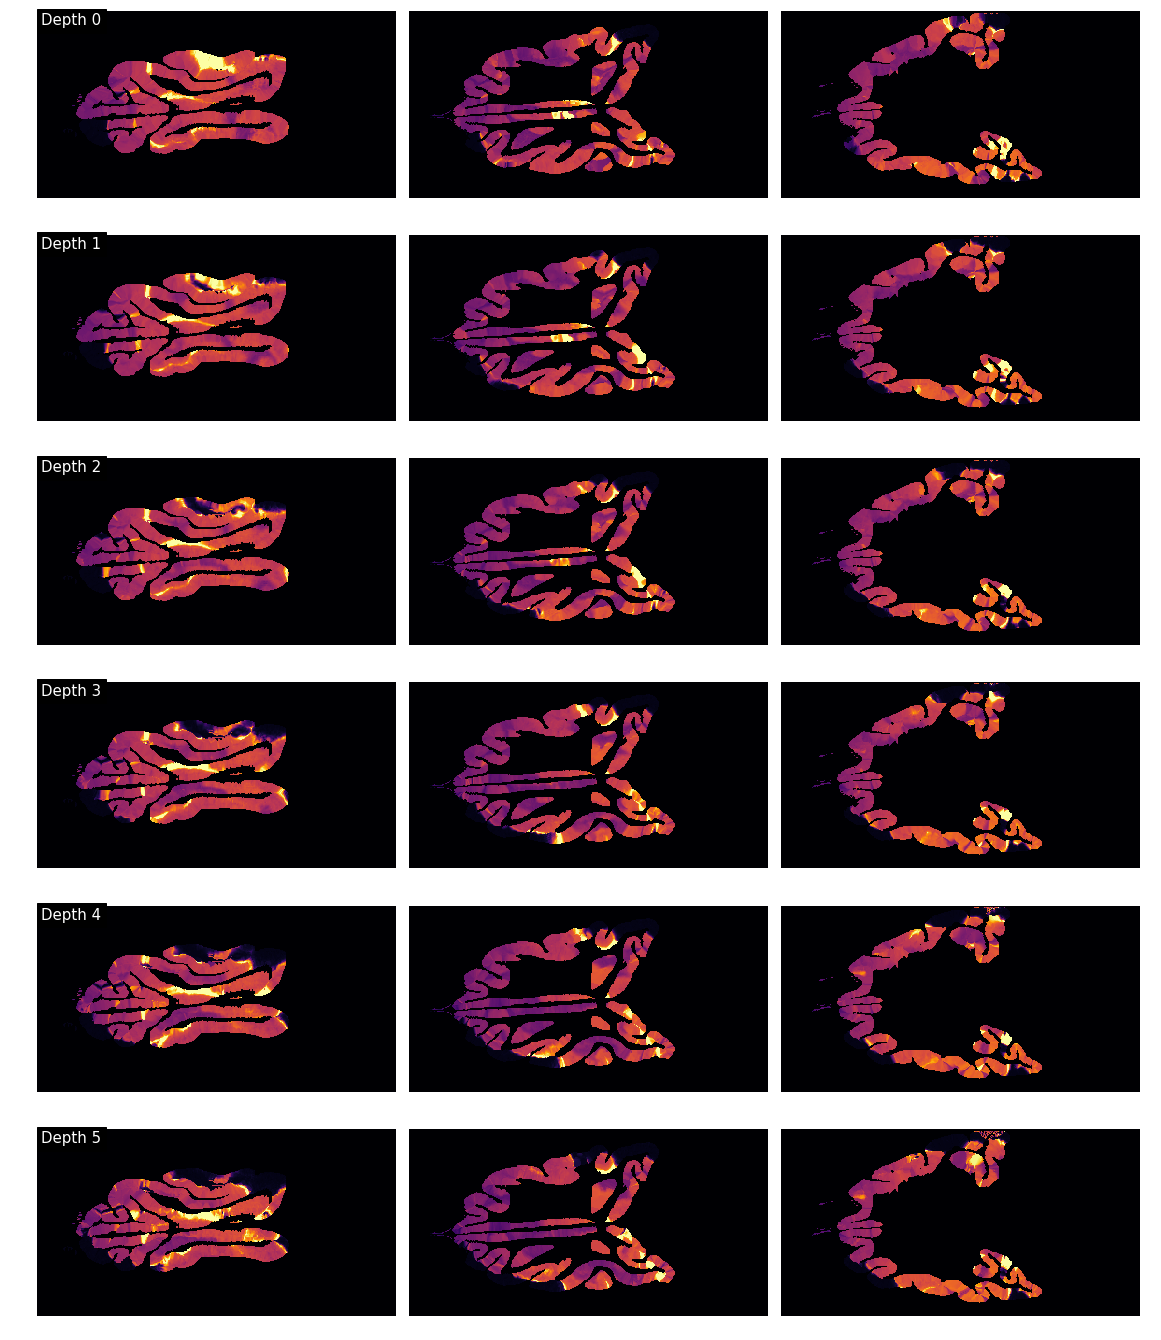

In [17]:
fig=plt.figure(figsize=(20,(n_layers+1)*4));
for i in range(n_layers+1):
    ax=fig.add_subplot(n_layers+1,1,i+1)
    plotting.plot_img(_index_img(profiles, i), annotate=False, draw_cross=False, display_mode='z', 
                      cut_coords=coords, figure=fig, axes=ax, title='Depth %s'%str(i), cmap='inferno', 
                      vmin=0,vmax=0.6*1e8)